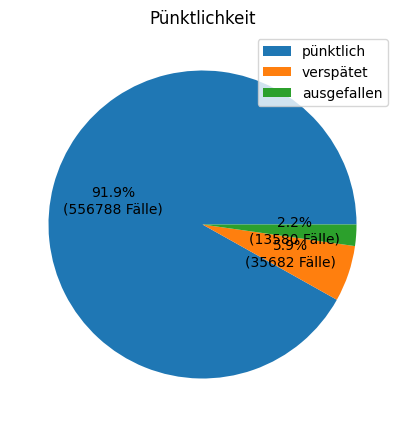

In [2]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import pymysql

db = pymysql.connect(host="localhost", user="rnv_importer", password="rnv_importer", database="rnv_big_data_mining")
cursor = db.cursor()
cursor.execute("SELECT COUNT(*) from stops where (api_plannedDeparture = api_realtimeDeparture)")
accurate = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) from stops where (api_plannedDeparture != api_realtimeDeparture)")
inaccurate = cursor.fetchone()[0]

cursor.execute("SELECT Count(*) from stops inner join journeys ON stops.api_journey = journeys.id where api_canceled = 1 and stops.api_realtimeDeparture is null")
canceled = cursor.fetchone()[0]

df = pd.DataFrame({'Prozentual': [accurate, inaccurate, canceled]},
                   index=['pünktlich', 'verspätet', 'ausgefallen'])

fig, ax = plt.subplots(figsize=(5, 5))

# Funktion zur Generierung des Texts für autopct
def custom_autopct(pct):
    absolute = int(pct / 100 * df.sum().values[0])
    return f'{pct:.1f}%\n({absolute} Fälle)'

# Pie chart mit Prozentangaben, absoluten Zahlen und custom Text
plot = df.plot.pie(y='Prozentual', autopct=custom_autopct, labels=None, ax=ax)
# entfernt Label (links)
ax.set_ylabel('')

# Legende anzeigen
ax.legend(df.index, loc='upper right')

plt.title('Pünktlichkeit')
plt.show()